<a href="https://colab.research.google.com/github/jthowinsson/Online-Retail/blob/main/Modelos_MACHINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 8.5 MB/s eta 0:00:00


In [ ]:
pip install openpyxl

In [ ]:
 pip install dask

In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy import stats



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset2.xlsx to dataset2.xlsx


In [ ]:
import pandas as pd

# Leer el archivo de Excel
data = pd.read_excel('dataset2.xlsx')


In [ ]:
import pandas as pd

# Leer todas las hojas de Excel y almacenarlas en un diccionario
dataset2 = pd.read_excel('dataset2.xlsx', sheet_name=None)

# Concatenar todas las hojas en un solo DataFrame
df_completo = pd.concat(dataset2.values(), ignore_index=True)

# Ver el DataFrame completo
print(df_completo)


        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                InvoiceDate  Price  Customer ID         Country  
0       2009-12-01 07

In [ ]:
# Número de filas y columnas
filas, columnas = df_completo.shape
print(f"El DataFrame tiene {filas} filas y {columnas} columnas.")

# Número total de datos (celdas)
total_datos = df_completo.size
print(f"El DataFrame contiene un total de {total_datos} datos (celdas).")
data = df_completo
# Concatenar los datasets en un único DataFrame (ajusta esta parte si df_completo ya está definido)
df_completo = pd.concat(dataset2.values(), ignore_index=True)

# Asegurar que la columna 'InvoiceDate' sea de tipo datetime
df_completo['InvoiceDate'] = pd.to_datetime(df_completo['InvoiceDate'])

# Filtrar valores negativos en la columna 'Quantity'
df_completo = df_completo[df_completo['Quantity'] >= 0]

# Ordenar los datos por fecha para una mejor visualización
df_completo = df_completo.sort_values(by='InvoiceDate')
# Contar valores negativos en la columna 'Quantity'
cantidad_negativos = (df_completo['Quantity'] < 0).sum()

print(f"Hay {cantidad_negativos} valores negativos en la columna 'Quantity'.")


El DataFrame tiene 1067371 filas y 8 columnas.
El DataFrame contiene un total de 8538968 datos (celdas).
Hay 0 valores negativos en la columna 'Quantity'.


In [ ]:
pip install ace_tools

In [ ]:
pip search ace_tools

ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


In [ ]:
pip install git+https://github.com/usuario/ace_tools.git

  Cloning https://github.com/usuario/ace_tools.git to /tmp/pip-req-build-xv_dhqpb
  Running command git clone --filter=blob:none --quiet https://github.com/usuario/ace_tools.git /tmp/pip-req-build-xv_dhqpb
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/usuario/ace_tools.git /tmp/pip-req-build-xv_dhqpb did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/usuario/ace_tools.git /tmp/pip-req-build-xv_dhqpb did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
import pandas as pd
import numpy as np

# Calcular el rango intercuartil (IQR) para detectar valores atípicos en 'Quantity'
Q1 = df_completo['Quantity'].quantile(0.25)
Q3 = df_completo['Quantity'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los valores atípicos
outliers = df_completo[(df_completo['Quantity'] < lower_bound) | (df_completo['Quantity'] > upper_bound)]

# Filtrar los outliers que son menores a 60,000 o mayores a 60,000
filtered_outliers = outliers[(outliers['Quantity'] > 20000)]
filtered_outliers1 = outliers[(outliers['Quantity'] < -20000)]
print(filtered_outliers)
print(filtered_outliers1)
# Filtrar para eliminar valores mayores a 20000 y valores negativos
df_filtrado = df_completo[(df_completo['Quantity'] <= 20000) & (df_completo['Quantity'] >= 0)]

# Verificar el resultado
print(f"Filas originales: {df_completo.shape[0]}")
print(f"Filas después de filtrar: {df_filtrado.shape[0]}")
df_sinoutliers= df_filtrado
# Para ver las columnas de df_sinoutliers
print(df_sinoutliers.columns)
# Asegúrate de que 'DATE_TIME' esté en formato datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
# Asegúrate de que 'DATE_TIME' es una columna de tipo datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')
import pandas as pd

# Asegúrate de que la columna 'DATE_TIME' sea del tipo datetime
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')

# Verificar si la conversión fue exitosa
print(df_sinoutliers['DATE_TIME'].head())  # Mostrar las primeras filas de la columna 'DATE_TIME'

# Verificar si hay valores nulos después de la conversión
print(f'Cantidad de valores nulos en DATE_TIME: {df_sinoutliers["DATE_TIME"].isna().sum()}')

# Si es necesario, establecer 'DATE_TIME' como índice (si se va a usar como tal)
df_sinoutliers.set_index('DATE_TIME', inplace=True)

# Ahora la columna 'DATE_TIME' está convertida correctamente a tipo datetime y como índice
print(df_sinoutliers.index)  # Verificar que el índice es de tipo DatetimeIndex

        Invoice StockCode                     Description  Quantity  \
587080   541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
1065882  581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

                InvoiceDate  Price  Customer ID         Country  
587080  2011-01-18 10:01:00   1.04      12346.0  United Kingdom  
1065882 2011-12-09 09:15:00   2.08      16446.0  United Kingdom  
Empty DataFrame
Columns: [Invoice, StockCode, Description, Quantity, InvoiceDate, Price, Customer ID, Country]
Index: []
Filas originales: 1044421
Filas después de filtrar: 1044419
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: DATE_TIME, dtype: datetime64[ns]
Cantidad de valores nulos en DATE_TIME: 0
DatetimeIndex(['2009-12-01 07:45:00', '2009-12-01 07:45:00',
       

<ipython-input-14-61bea737d70f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
<ipython-input-14-61bea737d70f>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')
<ipython-input-14-61bea737d70f>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [ ]:
# Si 'DATE_TIME' es el índice, reseteamos el índice para convertirlo en una columna normal
df_sinoutliers.reset_index(inplace=True)

# Ahora 'DATE_TIME' es una columna normal, y puedes acceder a ella sin problemas
df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')

# Verificar si 'DATE_TIME' ahora está correctamente convertida
print(df_sinoutliers['DATE_TIME'].head())
# Si ya tienes el índice como 'DATE_TIME', no es necesario convertirlo a columna
df_sinoutliers.set_index('DATE_TIME', inplace=True)

# Verificar el tipo de índice (debe ser DatetimeIndex)
print(type(df_sinoutliers.index))  # Esto debe imprimir: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

0   2009-12-01 07:45:00
1   2009-12-01 07:45:00
2   2009-12-01 07:45:00
3   2009-12-01 07:45:00
4   2009-12-01 07:45:00
Name: DATE_TIME, dtype: datetime64[ns]
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


<ipython-input-15-7d68cb00d634>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['DATE_TIME'] = pd.to_datetime(df_sinoutliers['DATE_TIME'], errors='coerce')


EN ESTE PROCESO DEBEMOS REPARTIR NUESTROS DATOS en train test forcast Y TRABAJAR CON MIMAXESCALER

In [ ]:
train_size = int(len(df_sinoutliers) * 0.8)
train_data = df_sinoutliers.iloc[:train_size]
test_data = df_sinoutliers.iloc[train_size:]


In [ ]:
sample_data = df_sinoutliers.sample(frac=0.1, random_state=42)


In [ ]:
forecast_data = df_sinoutliers.tail(12)


In [ ]:
# Obtener los nombres de las columnas de 'df_sinoutliers'
column_names = df_sinoutliers.columns

# Imprimir los nombres de las columnas
print(column_names)
df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'], errors='coerce')


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


<ipython-input-19-007495cdfda6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'], errors='coerce')


In [ ]:
df_sinoutliers['Year'] = df_sinoutliers['InvoiceDate'].dt.year
df_sinoutliers['Month'] = df_sinoutliers['InvoiceDate'].dt.month
df_sinoutliers['Day'] = df_sinoutliers['InvoiceDate'].dt.day
df_sinoutliers['Hour'] = df_sinoutliers['InvoiceDate'].dt.hour
df_sinoutliers['Minute'] = df_sinoutliers['InvoiceDate'].dt.minute
df_sinoutliers['Second'] = df_sinoutliers['InvoiceDate'].dt.second


<ipython-input-20-b19bb3b17df4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['Year'] = df_sinoutliers['InvoiceDate'].dt.year
<ipython-input-20-b19bb3b17df4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['Month'] = df_sinoutliers['InvoiceDate'].dt.month
<ipython-input-20-b19bb3b17df4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

MLP

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Asegúrate de que 'InvoiceDate' esté en formato datetime
df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])

# Extraer características de 'InvoiceDate'
df_sinoutliers['Year'] = df_sinoutliers['InvoiceDate'].dt.year
df_sinoutliers['Month'] = df_sinoutliers['InvoiceDate'].dt.month
df_sinoutliers['Day'] = df_sinoutliers['InvoiceDate'].dt.day
df_sinoutliers['Hour'] = df_sinoutliers['InvoiceDate'].dt.hour
df_sinoutliers['Minute'] = df_sinoutliers['InvoiceDate'].dt.minute
df_sinoutliers['Second'] = df_sinoutliers['InvoiceDate'].dt.second

# Imprimir los nombres de las columnas para verificar que las nuevas columnas fueron añadidas
column_names = df_sinoutliers.columns
print(column_names)

# Selección de las características (X) y la variable objetivo (y)
X = df_sinoutliers[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']]  # Características extraídas de 'InvoiceDate'
y = df_sinoutliers['Quantity']  # Variable objetivo

# 1. Normalización de las características numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# A continuación, si deseas usar MinMaxScaler, puedes hacerlo de la siguiente manera:

# 1. Inicializar el MinMaxScaler
scaler_minmax = MinMaxScaler(feature_range=(0, 1))

# 2. Aplicar el escalado solo en el conjunto de entrenamiento
X_train_scaled = scaler_minmax.fit_transform(X_train)  # Ajustar el scaler y transformar los datos de entrenamiento

# 3. Aplicar el escalado en el conjunto de prueba usando el mismo scaler (sin recalcular)
X_test_scaled = scaler_minmax.transform(X_test)  # Solo transformar el conjunto de prueba con el scaler ajustado en el conjunto de entrenamiento

# Ahora puedes usar X_train_scaled y X_test_scaled para entrenar y probar tu modelo.
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# 1. Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Inicializar el MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# 3. Aplicar el escalado solo en el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)  # Ajustar el scaler y transformar los datos de entrenamiento

# 4. Aplicar el escalado en el conjunto de prueba usando el mismo scaler (sin recalcular)
X_test_scaled = scaler.transform(X_test)  # Solo transformar el conjunto de prueba con el scaler ajustado en el conjunto de entrenamiento

# Ahora puedes usar X_train_scaled y X_test_scaled para entrenar y probar tu modelo.
X_train.reset_index(drop=True, inplace=True)
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Crear el modelo MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Entrenamiento
mlp_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred_mlp = mlp_model.predict(X_test_scaled)
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.stats.diagnostic import acorr_ljungbox

# Calcular MSE
mse_mlp = mean_squared_error(y_test, y_pred_mlp)

# Calcular RMSE
rmse_mlp = np.sqrt(mse_mlp)

# Calcular MAE
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# Calcular MAPE
mape_mlp = np.mean(np.abs((y_test - y_pred_mlp) / y_test)) * 100

# Prueba de Ljung-Box
lb_test_mlp = acorr_ljungbox(y_test - y_pred_mlp, lags=[10], return_df=True)  # Usamos lags=10 para la autocorrelación

# Mostrar resultados para MLP
print("Evaluación MLP:")
print(f'MSE: {mse_mlp}')
print(f'RMSE: {rmse_mlp}')
print(f'MAE: {mae_mlp}')
print(f'MAPE: {mape_mlp}%')

# Acceder al p-value de la prueba de Ljung-Box correctamente
print(f'Ljung-Box Test p-value: {lb_test_mlp["lb_pvalue"].iloc[0]}')  # Usando .iloc[0] para acceder a la primera fila
print('---')





<ipython-input-21-866461fb30d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
<ipython-input-21-866461fb30d3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['Year'] = df_sinoutliers['InvoiceDate'].dt.year
<ipython-input-21-866461fb30d3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Year', 'Month', 'Day', 'Hour',
       'Minute', 'Second'],
      dtype='object')
Evaluación MLP:
MSE: 4540.225141847077
RMSE: 67.38119279032597
MAE: 12.214858303245592
MAPE: 401.94527470874056%
Ljung-Box Test p-value: 0.9994310235744552
---


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.5 MB/s eta 0:00:00


<ipython-input-22-095b8846fe40>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])


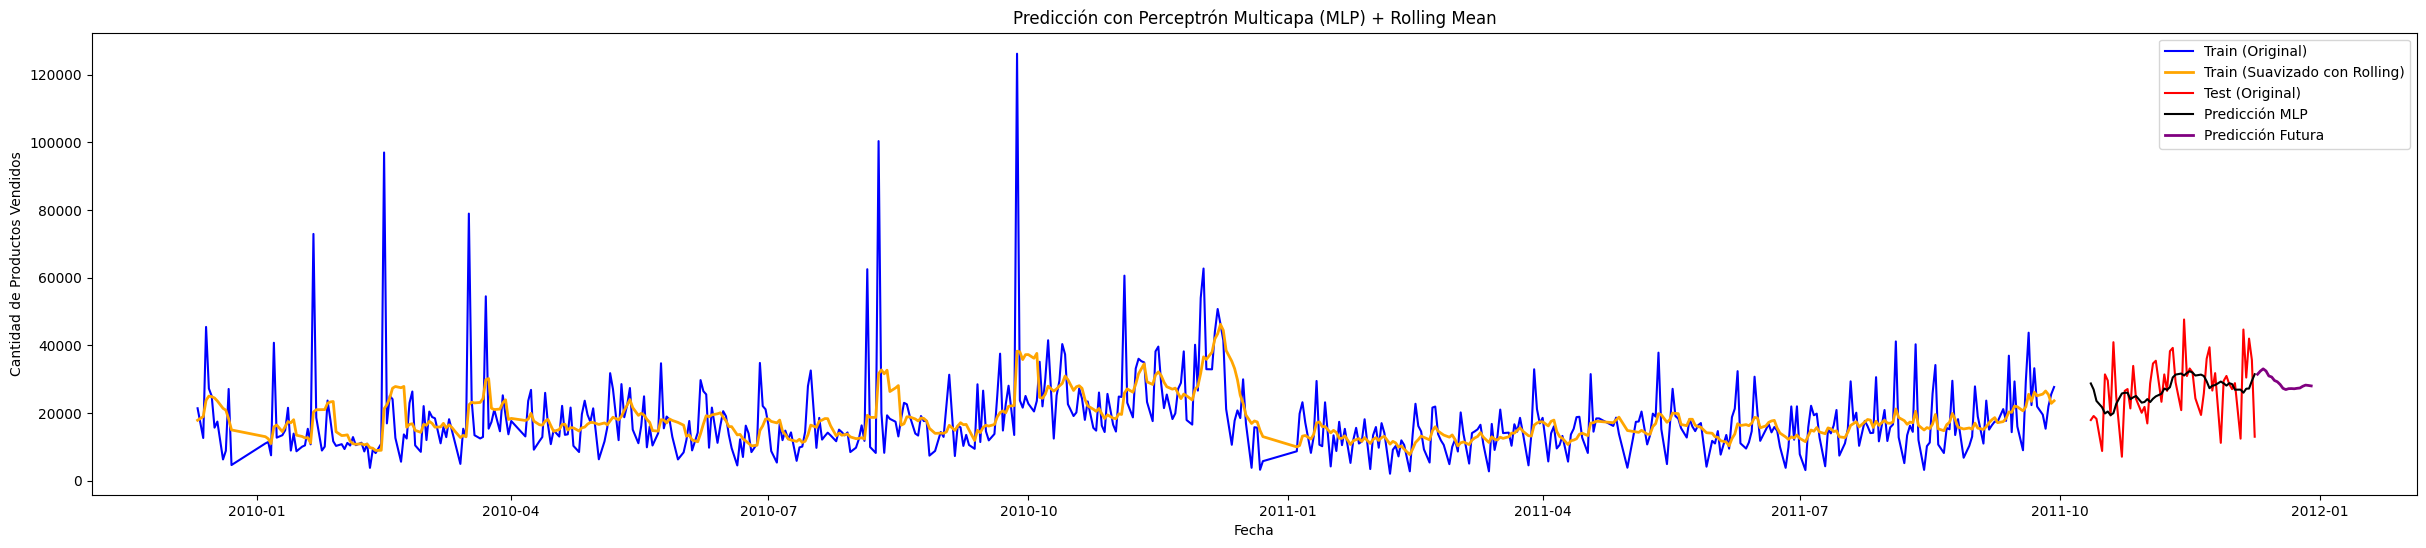

In [ ]:
# 📌 Instalación de paquetes necesarios
!pip install pmdarima scikit-learn

# 📌 Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox

#  Cargar y preparar los datos
if isinstance(df_sinoutliers.index, pd.DatetimeIndex):
    df_sinoutliers.reset_index(inplace=True)

df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])

#  Agrupar por día y sumar la cantidad de productos vendidos
data_daily = df_sinoutliers.groupby(df_sinoutliers['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
data_daily['InvoiceDate'] = pd.to_datetime(data_daily['InvoiceDate'])
data_daily.set_index('InvoiceDate', inplace=True)

#  Aplicar Rolling Mean (Suavización)
data_daily['Quantity_rolling'] = data_daily['Quantity'].rolling(window=7, min_periods=1).mean()

#  División en Train y Test (90% - 10%)
split_index = int(len(data_daily) * 0.9)
train, test = data_daily[:split_index], data_daily[split_index:]

#  Normalizar solo la columna 'Quantity_rolling'
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['Quantity_rolling']])
test_scaled = scaler.transform(test[['Quantity_rolling']])

# 📌 Crear conjuntos de datos en formato supervisado
def create_supervised_data(series, n_lags=10):
    X, y = [], []
    for i in range(n_lags, len(series)):
        X.append(series[i-n_lags:i, 0])  # Ventana de tiempo
        y.append(series[i, 0])  # Valor futuro
    return np.array(X), np.array(y)

n_lags = 10  # Número de días anteriores para predecir el siguiente
X_train, y_train = create_supervised_data(train_scaled, n_lags)
X_test, y_test = create_supervised_data(test_scaled, n_lags)

#  Verificar si hay valores NaN o Inf antes de entrenar
if np.any(np.isnan(X_train)) or np.any(np.isinf(X_train)):
    print("⚠️ X_train contiene valores NaN o Inf. Se reemplazarán con valores finitos.")
    X_train = np.nan_to_num(X_train, nan=0.0, posinf=10000, neginf=-10000)

if np.any(np.isnan(X_test)) or np.any(np.isinf(X_test)):
    print("⚠️ X_test contiene valores NaN o Inf. Se reemplazarán con valores finitos.")
    X_test = np.nan_to_num(X_test, nan=0.0, posinf=10000, neginf=-10000)

#  Aplanar X_train y X_test para que tengan forma (muestras, n_lags)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

#  Definir el modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

#  Entrenar el modelo
mlp.fit(X_train, y_train)

#  Hacer predicciones en test
predictions_scaled = mlp.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1))

#  Evaluar el modelo
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_original, predictions)
mse = mean_squared_error(y_test_original, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_original - predictions) / (y_test_original + 1e-10))) * 100  # Se evita división por cero

#  Prueba de Ljung-Box para evaluar autocorrelación en los residuos
residuos = y_test_original.flatten() - predictions.flatten()
ljung_box_pvalores = acorr_ljungbox(residuos, lags=[10], return_df=True)["lb_pvalue"].values[0]

#  Predicción futura (20 días)
num_days_forecast = 20
future_dates = pd.date_range(start=test.index[-1], periods=num_days_forecast + 1, freq='D')[1:]

future_forecast_mlp = []
last_window = X_test[-1].reshape(1, -1)

for _ in range(num_days_forecast):
    next_pred = mlp.predict(last_window)

    # Evitar NaN o Inf en predicciones futuras
    if np.isnan(next_pred) or np.isinf(next_pred):
        next_pred = np.array([0.0])

    future_forecast_mlp.append(next_pred[0])
    last_window = np.roll(last_window, -1)
    last_window[0, -1] = next_pred[0]  # Añadir la predicción a la ventana

#  Desnormalizar predicciones futuras
future_forecast_mlp = scaler.inverse_transform(np.array(future_forecast_mlp).reshape(-1, 1))

#  Graficar los resultados asegurando que las dimensiones coincidan
plt.figure(figsize=(30, 6))

# Ajustar los índices en función de n_lags para evitar desajustes en la gráfica
plt.plot(train.index[n_lags:], train['Quantity'].iloc[n_lags:], label='Train (Original)', color='blue')
plt.plot(train.index[n_lags:], train['Quantity_rolling'].iloc[n_lags:], linestyle='-', linewidth=2, label='Train (Suavizado con Rolling)', color='orange')
plt.plot(test.index[n_lags:], test['Quantity'].iloc[n_lags:], label='Test (Original)', color='red')
plt.plot(test.index[n_lags:], predictions, label='Predicción MLP', color='black')
plt.plot(future_dates, future_forecast_mlp, linestyle='-', linewidth=2, color='purple', label='Predicción Futura')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title('Predicción con Perceptrón Multicapa (MLP) + Rolling Mean')
plt.legend()
plt.show()




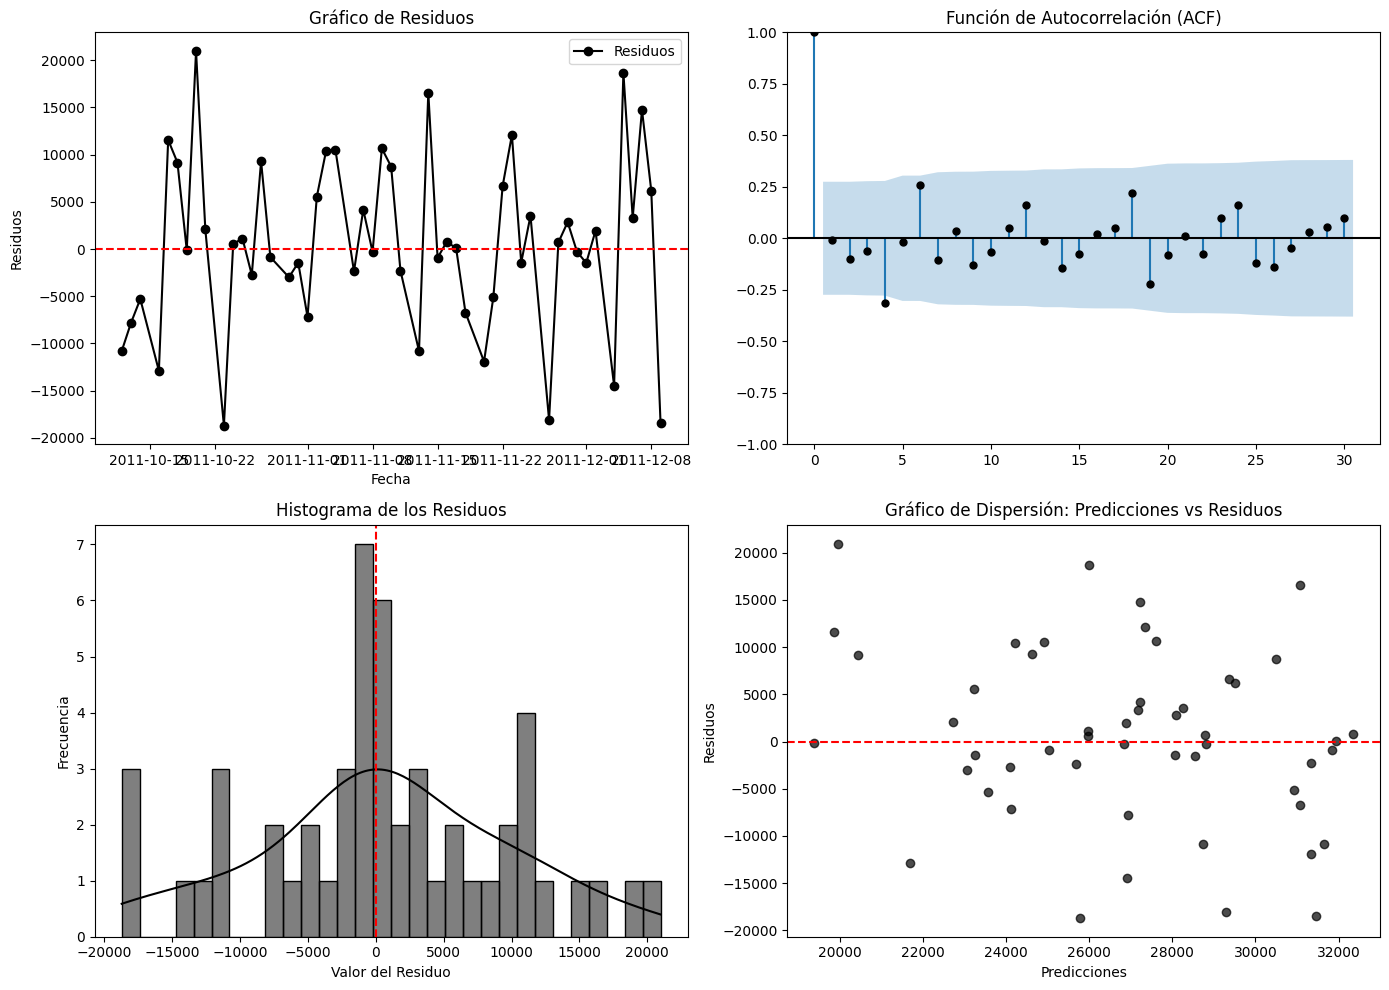

In [ ]:
#  Asegurar que las dimensiones coincidan
test_trimmed = test.iloc[n_lags:].copy()  # Ajuste para coincidir con predicciones
residuos_mlp = test_trimmed['Quantity'].values - predictions.flatten()

#  Configurar el tamaño del gráfico con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#  1. Gráfico de Residuos
axes[0, 0].plot(test_trimmed.index, residuos_mlp, marker='o', linestyle='-', color='black', label="Residuos")
axes[0, 0].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[0, 0].set_title("Gráfico de Residuos")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].legend()

#  2. Función de Autocorrelación (ACF)
plot_acf(residuos_mlp, lags=30, ax=axes[0, 1], color='black')
axes[0, 1].set_title("Función de Autocorrelación (ACF)")

#  3. Histograma de los Residuos con KDE
sns.histplot(residuos_mlp, bins=30, kde=True, ax=axes[1, 0], color='black')
axes[1, 0].axvline(x=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 0].set_title("Histograma de los Residuos")
axes[1, 0].set_xlabel("Valor del Residuo")
axes[1, 0].set_ylabel("Frecuencia")

#  4. Gráfico de Dispersión: Predicciones vs Residuos
axes[1, 1].scatter(predictions.flatten(), residuos_mlp, color='black', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 1].set_title("Gráfico de Dispersión: Predicciones vs Residuos")
axes[1, 1].set_xlabel("Predicciones")
axes[1, 1].set_ylabel("Residuos")

#  Ajustar diseño y mostrar
plt.tight_layout()
plt.show()



In [ ]:
from statsmodels.tsa.stattools import bds

# Asumiendo que 'residuos' es tu serie temporal de residuos (ya calculados previamente)
bds_statistic, bds_p_value = bds(residuos_mlp)

# Imprimir el estadístico del test y el valor p
print("Estadístico del test BDS:", bds_statistic)
print("Vbds_p_value BDS:", bds_p_value)

import numpy as np
import pandas as pd

# Definir el parámetro de suavización lambda_ (por ejemplo, 0.6)
lambda_ = 0.6

# Suponiendo que tienes los datos preparados y las predicciones calculadas previamente

# Suavización exponencial de primer orden en el conjunto de entrenamiento
y1 = train['Quantity_rolling'].copy()  # Aquí se define 'y1'
y1.iloc[0] = train['Quantity_rolling'].iloc[0]

for t in range(1, len(train)):
    y1.iloc[t] = lambda_ * train['Quantity_rolling'].iloc[t] + (1 - lambda_) * y1.iloc[t-1]

# Predicciones en test usando última observación suavizada
y1_test = test['Quantity_rolling'].copy()
y1_test.iloc[0] = y1.iloc[-1]  # Usamos la última predicción del conjunto de entrenamiento para inicializar

for t in range(1, len(test)):
    y1_test.iloc[t] = lambda_ * test['Quantity_rolling'].iloc[t] + (1 - lambda_) * y1_test.iloc[t-1]

# Aquí definimos las predicciones del modelo para el conjunto de test
test_predictions = y1_test.copy()

# Ahora calculamos el error del modelo
error_model = test['Quantity'] - test_predictions

# Ahora puedes continuar con el resto de tu análisis
print("Error del modelo:", error_model)


import numpy as np
import pandas as pd
from statsmodels.tools.eval_measures import rmse

# Predicciones en test usando última observación suavizada
y1_test = test['Quantity_rolling'].copy()
y1_test.iloc[0] = y1.iloc[-1]

for t in range(1, len(test)):
    y1_test.iloc[t] = lambda_ * test['Quantity_rolling'].iloc[t] + (1 - lambda_) * y1_test.iloc[t-1]

test_predictions = y1_test.copy()


# Asumimos que tienes las predicciones de tu modelo en `test_predictions` y los valores reales en `test['Quantity']`

# 1. Calcula los errores de los dos modelos
error_model = test['Quantity'] -test_predictions

# Usamos el modelo de referencia, en este caso, predicción de la media de la serie temporal
error_benchmark = test['Quantity'] - test['Quantity'].mean()

# 2. Calcula la diferencia entre los errores al cuadrado
# La fórmula de Diebold-Mariano utiliza las diferencias al cuadrado de los errores
d = (error_model ** 2) - (error_benchmark ** 2)

# 3. Calcular la estadística del test de Diebold-Mariano
# La estadística de Diebold-Mariano sigue una distribución normal asintótica bajo la hipótesis nula
dm_statistic = np.mean(d) / (np.std(d) / np.sqrt(len(d)))

# 4. Calcular el valor p (para pruebas de dos colas)
from scipy.stats import norm

# p-valor para una prueba de dos colas
dm_p_value = 2 * (1 - norm.cdf(np.abs(dm_statistic)))

# Imprimir los resultados del test Diebold-Mariano
print("Estadístico del test Diebold-Mariano:", dm_statistic)
print("Valor p del test Diebold-Mariano:", dm_p_value)


Estadístico del test BDS: 0.5900791570168724
Vbds_p_value BDS: 0.5551375817924207
Error del modelo: InvoiceDate
2011-07-21     3845.861567
2011-07-22    -5730.312516
2011-07-24      842.960708
2011-07-25    -1478.301431
2011-07-26    -3715.749144
                  ...     
2011-12-05    17261.676533
2011-12-06     2117.242042
2011-12-07    12302.182531
2011-12-08     4851.758727
2011-12-09   -17086.553652
Length: 121, dtype: float64
Estadístico del test Diebold-Mariano: -3.8689474505167394
Valor p del test Diebold-Mariano: 0.00010930619485027826


RNN

<ipython-input-28-40b2ff8c77c4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.0097 - val_loss: 0.0027
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0054 - val_loss: 0.0030
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0044 - val_loss: 0.0027
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0038 - val_loss: 0.0024
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0044 - val_loss: 0.0024
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0040 - val_loss: 0.0026
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0047 - val_loss: 0.0025
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 9/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 10/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0035 - val_loss: 0.0021
Epoch 11/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0037 - val_loss: 0.0026
Epoch 12/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035 - val_loss: 

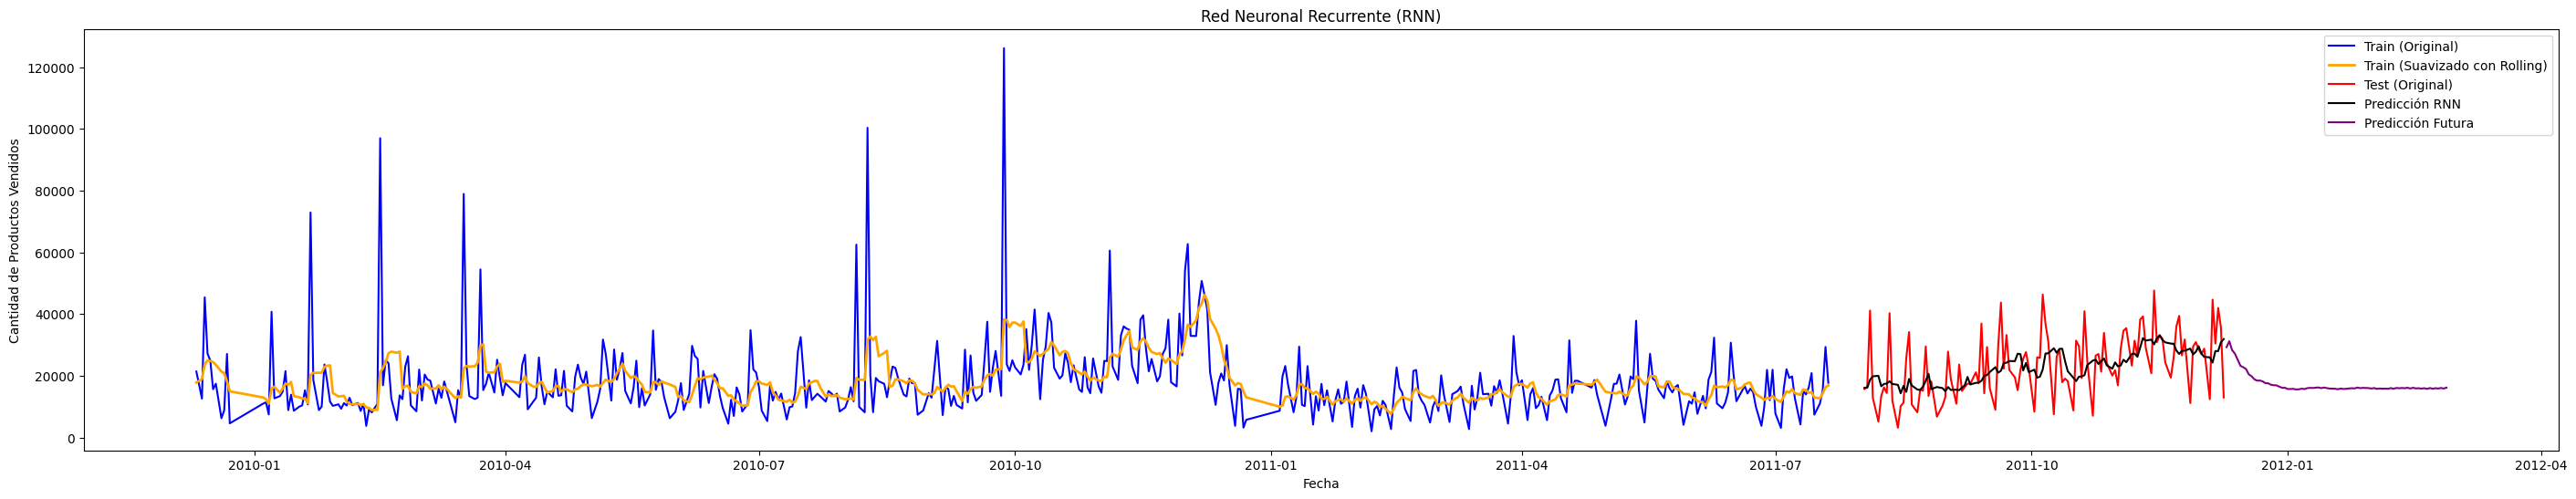


📌 MÉTRICAS DEL MODELO RNN CON ROLLING MEAN:
➡️ MAE  (Error Absoluto Medio): 1229.3030
➡️ MSE  (Error Cuadrático Medio): 2374622.2076
➡️ RMSE (Raíz del Error Cuadrático Medio): 1540.9809
➡️ MAPE (Error Porcentual Absoluto Medio): 5.39%
➡️ p-valor de la Prueba de Ljung-Box: 0.2946
✅ No se detecta autocorrelación significativa en los residuos (p >= 0.05).


In [ ]:
#  Instalación de paquetes necesarios
!pip install pmdarima tensorflow scikit-learn

#  Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox

#  Cargar y preparar los datos
if isinstance(df_sinoutliers.index, pd.DatetimeIndex):
    df_sinoutliers.reset_index(inplace=True)

df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])

# Agrupar por día y sumar la cantidad de productos vendidos
data_daily = df_sinoutliers.groupby(df_sinoutliers['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
data_daily['InvoiceDate'] = pd.to_datetime(data_daily['InvoiceDate'])
data_daily.set_index('InvoiceDate', inplace=True)

#  Aplicar Rolling Mean (Suavización)
data_daily['Quantity_rolling'] = data_daily['Quantity'].rolling(window=7, min_periods=1).mean()

#  División en Train y Test (80% - 20%)
split_index = int(len(data_daily) * 0.8)
train, test = data_daily[:split_index], data_daily[split_index:]

#  Normalizar los datos (RNN es sensible a las escalas)
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['Quantity_rolling']])
test_scaled = scaler.transform(test[['Quantity_rolling']])

#  Crear conjuntos de datos en formato supervisado para RNN
def create_rnn_data(series, n_lags=10):
    X, y = [], []
    for i in range(n_lags, len(series)):
        X.append(series[i-n_lags:i])  # Ventana de tiempo pasada
        y.append(series[i])  # Valor futuro a predecir
    return np.array(X), np.array(y)

n_lags = 10  # Número de días anteriores para predecir el siguiente
X_train, y_train = create_rnn_data(train_scaled, n_lags)
X_test, y_test = create_rnn_data(test_scaled, n_lags)

#  Ajustar la forma de los datos para RNN (muestras, pasos de tiempo, características)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#  Definir el modelo RNN
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=False, input_shape=(n_lags, 1)),
    Dense(1)
])

#  Compilar el modelo
model.compile(optimizer='adam', loss='mse')

#  Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

#  Hacer predicciones en el conjunto de prueba
predictions_scaled = model.predict(X_test)

#  Desnormalizar las predicciones
predictions = scaler.inverse_transform(predictions_scaled)

#  Evaluar el modelo
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_original, predictions)
mse = mean_squared_error(y_test_original, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_original - predictions) / (y_test_original + 1e-10))) * 100  # Se evita división por cero

#  Prueba de Ljung-Box para evaluar autocorrelación en los residuos
residuos = y_test_original.flatten() - predictions.flatten()
ljung_box_pvalores = acorr_ljungbox(residuos, lags=[10], return_df=True)["lb_pvalue"].values[0]

#  Predicción futura (80días)
num_days_forecast = 80
future_dates = pd.date_range(start=test.index[-1], periods=num_days_forecast + 1, freq='D')[1:]

future_forecast_scaled = []

# Iniciar con los últimos valores de la serie
last_window = test_scaled[-n_lags:].reshape(1, n_lags, 1)

for _ in range(num_days_forecast):
    next_prediction_scaled = model.predict(last_window)[0, 0]
    future_forecast_scaled.append(next_prediction_scaled)

    # Desplazar ventana de tiempo
    last_window = np.roll(last_window, shift=-1, axis=1)
    last_window[0, -1, 0] = next_prediction_scaled

#  Desnormalizar predicción futura
future_forecast = scaler.inverse_transform(np.array(future_forecast_scaled).reshape(-1, 1))

#  Graficar los resultados asegurando que las dimensiones coincidan
plt.figure(figsize=(35,6))

# Ajustar los índices en función de n_lags para evitar desajustes en la gráfica
plt.plot(train.index[n_lags:], train['Quantity'].iloc[n_lags:], label='Train (Original)', color='blue')
plt.plot(train.index[n_lags:], train['Quantity_rolling'].iloc[n_lags:], linestyle='-', linewidth=2, label='Train (Suavizado con Rolling)', color='orange')
plt.plot(test.index[n_lags:], test['Quantity'].iloc[n_lags:], label='Test (Original)', color='red')
plt.plot(test.index[n_lags:], predictions, label='Predicción RNN', color='black')
plt.plot(future_dates, future_forecast, label='Predicción Futura', color='purple')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title('Red Neuronal Recurrente (RNN)')
plt.legend()
plt.show()

# 📌 Imprimir métricas de error
print("\n📌 MÉTRICAS DEL MODELO RNN CON ROLLING MEAN:")
print(f"➡️ MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"➡️ MSE  (Error Cuadrático Medio): {mse:.4f}")
print(f"➡️ RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"➡️ MAPE (Error Porcentual Absoluto Medio): {mape:.2f}%")
print(f"➡️ p-valor de la Prueba de Ljung-Box: {ljung_box_pvalores:.4f}")

# 📢 Interpretación de la prueba de Ljung-Box
if ljung_box_pvalores < 0.05:
    print("⚠️ Los residuos presentan autocorrelación significativa (p < 0.05).")
else:
    print("✅ No se detecta autocorrelación significativa en los residuos (p >= 0.05).")



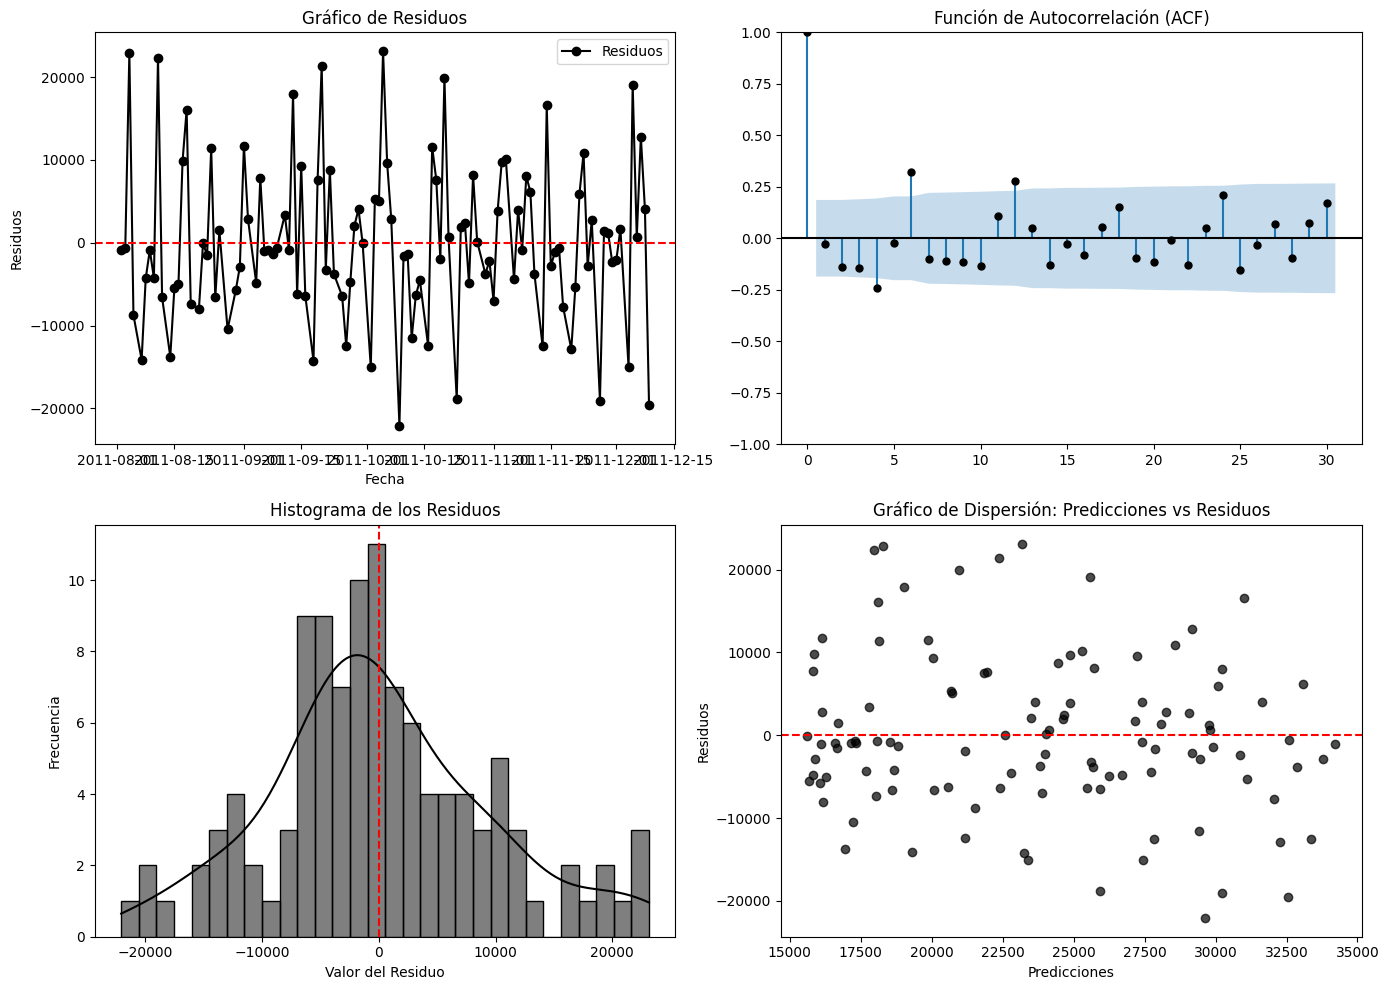

In [ ]:
#  Asegurar que las dimensiones coincidan
test_trimmed = test.iloc[n_lags:].copy()  # Ajuste para coincidir con predicciones
residuos_rnn = test_trimmed['Quantity'].values - predictions.flatten()

#  Configurar el tamaño del gráfico con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#  1. Gráfico de Residuos
axes[0, 0].plot(test_trimmed.index, residuos_rnn, marker='o', linestyle='-', color='black', label="Residuos")
axes[0, 0].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[0, 0].set_title("Gráfico de Residuos")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].legend()

#  2. Función de Autocorrelación (ACF)
plot_acf(residuos_rnn, lags=30, ax=axes[0, 1],color='black')
axes[0, 1].set_title("Función de Autocorrelación (ACF)")

#  3. Histograma de los Residuos con KDE
sns.histplot(residuos_rnn, bins=30, kde=True, ax=axes[1, 0], color='black')
axes[1, 0].axvline(x=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 0].set_title("Histograma de los Residuos")
axes[1, 0].set_xlabel("Valor del Residuo")
axes[1, 0].set_ylabel("Frecuencia")

# 📌 4. Gráfico de Dispersión: Predicciones vs Residuos
axes[1, 1].scatter(predictions.flatten(), residuos_rnn, color='black', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 1].set_title("Gráfico de Dispersión: Predicciones vs Residuos")
axes[1, 1].set_xlabel("Predicciones")
axes[1, 1].set_ylabel("Residuos")

# 📌 Ajustar diseño y mostrar
plt.tight_layout()
plt.show()




In [ ]:
from statsmodels.tsa.stattools import bds

# Asumiendo que 'residuos' es tu serie temporal de residuos (ya calculados previamente)
bds_statistic, bds_p_value = bds(residuos_rnn)

# Imprimir el estadístico del test y el valor p
print("Estadístico del test BDS:", bds_statistic)
print("Vbds_p_value BDS:", bds_p_value)


import numpy as np
import pandas as pd
from statsmodels.tools.eval_measures import rmse

# Asumimos que tienes las predicciones de tu modelo en `test_predictions` y los valores reales en `test['Quantity']`

# 1. Calcula los errores de los dos modelos
error_model = test['Quantity'] - test_predictions

# Usamos el modelo de referencia, en este caso, predicción de la media de la serie temporal
error_benchmark = test['Quantity'] - test['Quantity'].mean()

# 2. Calcula la diferencia entre los errores al cuadrado
# La fórmula de Diebold-Mariano utiliza las diferencias al cuadrado de los errores
d = (error_model ** 2) - (error_benchmark ** 2)

# 3. Calcular la estadística del test de Diebold-Mariano
# La estadística de Diebold-Mariano sigue una distribución normal asintótica bajo la hipótesis nula
dm_statistic = np.mean(d) / (np.std(d) / np.sqrt(len(d)))

# 4. Calcular el valor p (para pruebas de dos colas)
from scipy.stats import norm

# p-valor para una prueba de dos colas
dm_p_value = 2 * (1 - norm.cdf(np.abs(dm_statistic)))

# Imprimir los resultados del test Diebold-Mariano
print("Estadístico del test Diebold-Mariano:", dm_statistic)
print("Valor p del test Diebold-Mariano:", dm_p_value)


Estadístico del test BDS: -0.3576595710946703
Vbds_p_value BDS: 0.7205980918787307
Estadístico del test Diebold-Mariano: -3.8689474505167394
Valor p del test Diebold-Mariano: 0.00010930619485027826


LSTM

<ipython-input-26-0d420e151d6e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.0541 - val_loss: 0.0059
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0133 - val_loss: 0.0083
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0100 - val_loss: 0.0058
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0089 - val_loss: 0.0051
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0086 - val_loss: 0.0054
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0067 - val_loss: 0.0093
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0067 - val_loss: 0.0067
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0069 - val_loss: 0.0088
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0071 - val_loss: 0.0046
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0067 - val_loss: 0.0041
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0061 - val_loss: 0.0044
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0

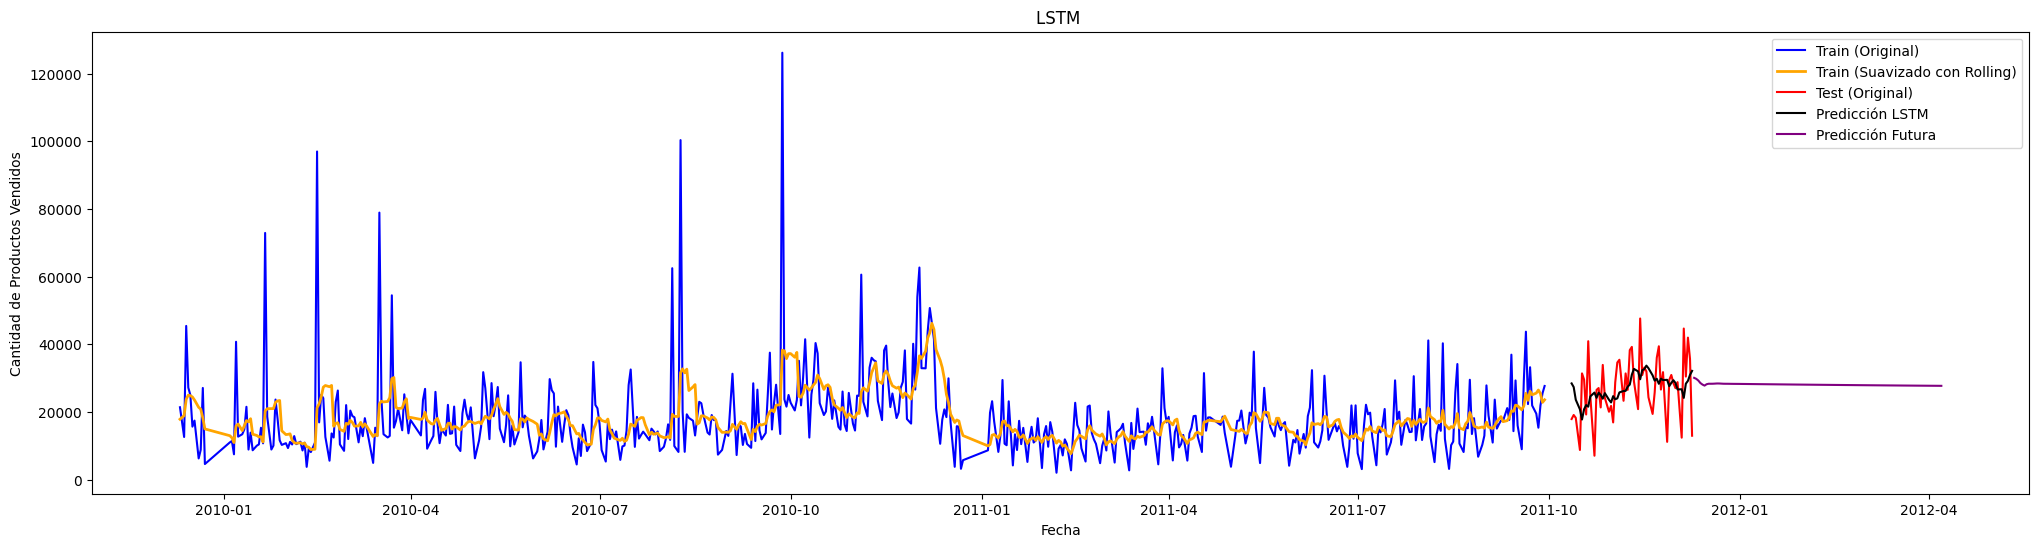


 MÉTRICAS DEL MODELO LSTM CON ROLLING MEAN:
➡️ MAE  (Error Absoluto Medio): 1531.4339
➡️ MSE  (Error Cuadrático Medio): 3406475.3996
➡️ RMSE (Raíz del Error Cuadrático Medio): 1845.6639
➡️ MAPE (Error Porcentual Absoluto Medio): 5.84%
➡️ p-valor de la Prueba de Ljung-Box: 0.2193
✅ No se detecta autocorrelación significativa en los residuos (p >= 0.05).


In [ ]:
# 📌 Instalación de paquetes necesarios
!pip install pmdarima tensorflow scikit-learn

# 📌 Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox

# Cargar y preparar los datos
if isinstance(df_sinoutliers.index, pd.DatetimeIndex):
    df_sinoutliers.reset_index(inplace=True)

df_sinoutliers['InvoiceDate'] = pd.to_datetime(df_sinoutliers['InvoiceDate'])

#  Agrupar por día y sumar la cantidad de productos vendidos
data_daily = df_sinoutliers.groupby(df_sinoutliers['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()
data_daily['InvoiceDate'] = pd.to_datetime(data_daily['InvoiceDate'])
data_daily.set_index('InvoiceDate', inplace=True)

#  Aplicar Rolling Mean (Suavización)
data_daily['Quantity_rolling'] = data_daily['Quantity'].rolling(window=7, min_periods=1).mean()

#  División en Train y Test (90% - 10%)
split_index = int(len(data_daily) * 0.9)
train, test = data_daily[:split_index], data_daily[split_index:]

#  Normalizar solo la columna 'Quantity_rolling'
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train[['Quantity_rolling']])
test_scaled = scaler.transform(test[['Quantity_rolling']])

#  Crear conjuntos de datos en formato supervisado para LSTM
def create_lstm_data(series, n_lags=10):
    X, y = [], []
    for i in range(n_lags, len(series)):
        X.append(series[i-n_lags:i, 0])  # Ventana de tiempo
        y.append(series[i, 0])  # Valor futuro a predecir
    return np.array(X), np.array(y)

n_lags = 10  # Número de días anteriores para predecir el siguiente
X_train, y_train = create_lstm_data(train_scaled, n_lags)
X_test, y_test = create_lstm_data(test_scaled, n_lags)

#  Ajustar la forma de los datos para LSTM (muestras, pasos de tiempo, características)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#  Definir el modelo LSTM (manteniendo estructura original)
model = Sequential([
    LSTM(50, activation='relu', return_sequences=False, input_shape=(n_lags, 1)),
    Dense(1)
])

#  Compilar el modelo
model.compile(optimizer='adam', loss='mse')

#  Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

#  Hacer predicciones en test
predictions_scaled = model.predict(X_test)

#  Desnormalizar las predicciones
predictions = scaler.inverse_transform(predictions_scaled)

#  Evaluar el modelo
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_original, predictions)
mse = mean_squared_error(y_test_original, predictions)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_original - predictions) / (y_test_original + 1e-10))) * 100  # Se evita división por cero

#  Prueba de Ljung-Box para evaluar autocorrelación en los residuos
residuos = y_test_original.flatten() - predictions.flatten()
ljung_box_pvalores = acorr_ljungbox(residuos, lags=[10], return_df=True)["lb_pvalue"].values[0]

#  Predicción futura (120 días)
num_days_forecast = 120
future_dates = pd.date_range(start=test.index[-1], periods=num_days_forecast + 1, freq='D')[1:]

future_forecast_scaled = []

# Iniciar con los últimos valores de la serie
last_window = test_scaled[-n_lags:].reshape(1, n_lags, 1)

for _ in range(num_days_forecast):
    next_prediction_scaled = model.predict(last_window)[0, 0]

    #  Regularización de la predicción para evitar inestabilidad
    if len(future_forecast_scaled) > 5:
        next_prediction_scaled = (next_prediction_scaled + np.mean(future_forecast_scaled[-5:])) / 2

    future_forecast_scaled.append(next_prediction_scaled)

    # Desplazar ventana de tiempo
    last_window = np.roll(last_window, shift=-1, axis=1)
    last_window[0, -1, 0] = next_prediction_scaled

#  Desnormalizar predicción futura
future_forecast = scaler.inverse_transform(np.array(future_forecast_scaled).reshape(-1, 1))

#  Graficar los resultados asegurando que las dimensiones coincidan
plt.figure(figsize=(25,6))

# Ajustar los índices en función de n_lags para evitar desajustes en la gráfica
plt.plot(train.index[n_lags:], train['Quantity'].iloc[n_lags:], label='Train (Original)', color='blue')
plt.plot(train.index[n_lags:], train['Quantity_rolling'].iloc[n_lags:], linestyle='-', linewidth=2, label='Train (Suavizado con Rolling)', color='orange')
plt.plot(test.index[n_lags:], test['Quantity'].iloc[n_lags:], label='Test (Original)', color='red')
plt.plot(test.index[n_lags:], predictions, label='Predicción LSTM', color='black')
plt.plot(future_dates, future_forecast, label='Predicción Futura', color='purple')

plt.xlabel('Fecha')
plt.ylabel('Cantidad de Productos Vendidos')
plt.title('LSTM ')
plt.legend()
plt.show()

# Imprimir métricas de error
print("\n MÉTRICAS DEL MODELO LSTM CON ROLLING MEAN:")
print(f"➡️ MAE  (Error Absoluto Medio): {mae:.4f}")
print(f"➡️ MSE  (Error Cuadrático Medio): {mse:.4f}")
print(f"➡️ RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"➡️ MAPE (Error Porcentual Absoluto Medio): {mape:.2f}%")
print(f"➡️ p-valor de la Prueba de Ljung-Box: {ljung_box_pvalores:.4f}")

#  Interpretación de la prueba de Ljung-Box
if ljung_box_pvalores < 0.05:
    print("⚠️ Los residuos presentan autocorrelación significativa (p < 0.05).")
else:
    print("✅ No se detecta autocorrelación significativa en los residuos (p >= 0.05).")



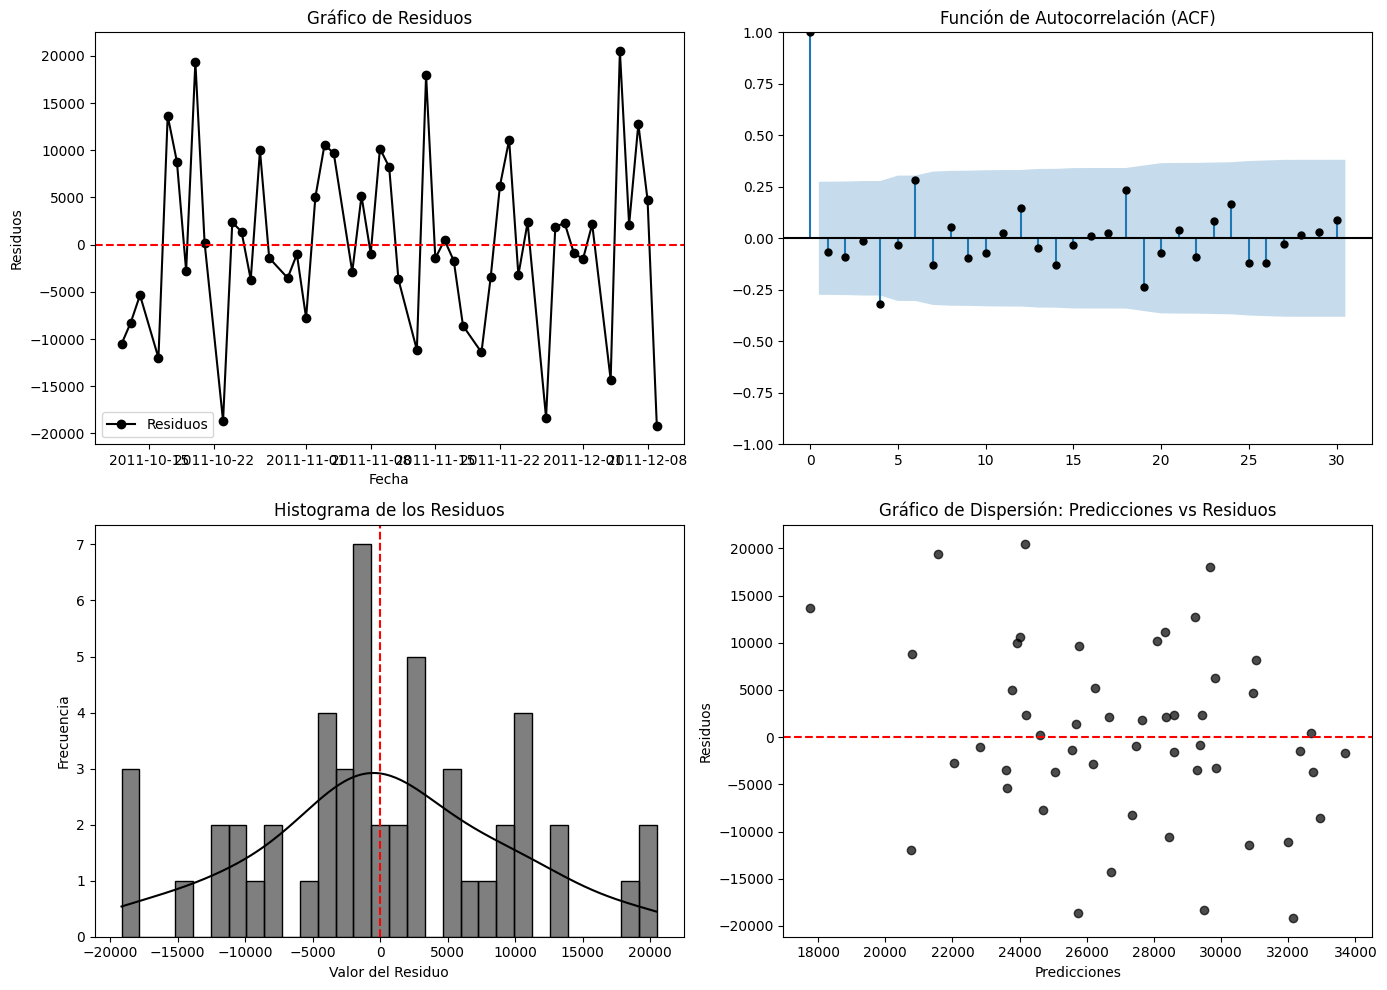

In [ ]:
#  Asegurar que las dimensiones coincidan
test_trimmed = test.iloc[n_lags:].copy()  # Ajuste para coincidir con predicciones
residuos_lstm = test_trimmed['Quantity'].values - predictions.flatten()

#  Configurar el tamaño del gráfico con 4 subgráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#  1. Gráfico de Residuos
axes[0, 0].plot(test_trimmed.index, residuos_lstm, marker='o', linestyle='-', color='black', label="Residuos")
axes[0, 0].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[0, 0].set_title("Gráfico de Residuos")
axes[0, 0].set_xlabel("Fecha")
axes[0, 0].set_ylabel("Residuos")
axes[0, 0].legend()

#  2. Función de Autocorrelación (ACF)
plot_acf(residuos_lstm, lags=30, ax=axes[0, 1], color='black')
axes[0, 1].set_title("Función de Autocorrelación (ACF)")

# 📌 3. Histograma de los Residuos con KDE
sns.histplot(residuos_lstm, bins=30, kde=True, ax=axes[1, 0],  color='black')
axes[1, 0].axvline(x=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 0].set_title("Histograma de los Residuos")
axes[1, 0].set_xlabel("Valor del Residuo")
axes[1, 0].set_ylabel("Frecuencia")

#  4. Gráfico de Dispersión: Predicciones vs Residuos
axes[1, 1].scatter(predictions.flatten(), residuos_lstm,  color='black', alpha=0.7)
axes[1, 1].axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
axes[1, 1].set_title("Gráfico de Dispersión: Predicciones vs Residuos")
axes[1, 1].set_xlabel("Predicciones")
axes[1, 1].set_ylabel("Residuos")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()




In [ ]:
from statsmodels.tsa.stattools import bds

# Asumiendo que 'residuos' es tu serie temporal de residuos (ya calculados previamente)
bds_statistic, bds_p_value = bds(residuos_lstm)

# Imprimir el estadístico del test y el valor p
print("Estadístico del test BDS:", bds_statistic)
print("Vbds_p_value BDS:", bds_p_value)


import numpy as np
import pandas as pd
from statsmodels.tools.eval_measures import rmse

# Asumimos que tienes las predicciones de tu modelo en `test_predictions` y los valores reales en `test['Quantity']`

# 1. Calcula los errores de los dos modelos
error_model = test['Quantity'] - test_predictions

# Usamos el modelo de referencia, en este caso, predicción de la media de la serie temporal
error_benchmark = test['Quantity'] - test['Quantity'].mean()

# 2. Calcula la diferencia entre los errores al cuadrado
# La fórmula de Diebold-Mariano utiliza las diferencias al cuadrado de los errores
d = (error_model ** 2) - (error_benchmark ** 2)

# 3. Calcular la estadística del test de Diebold-Mariano
# La estadística de Diebold-Mariano sigue una distribución normal asintótica bajo la hipótesis nula
dm_statistic = np.mean(d) / (np.std(d) / np.sqrt(len(d)))

# 4. Calcular el valor p (para pruebas de dos colas)
from scipy.stats import norm

# p-valor para una prueba de dos colas
dm_p_value = 2 * (1 - norm.cdf(np.abs(dm_statistic)))

# Imprimir los resultados del test Diebold-Mariano
print("Estadístico del test Diebold-Mariano:", dm_statistic)
print("Valor p del test Diebold-Mariano:", dm_p_value)


Estadístico del test BDS: 0.976004929567638
Vbds_p_value BDS: 0.32906202147359465
Estadístico del test Diebold-Mariano: -3.8689474505167394
Valor p del test Diebold-Mariano: 0.00010930619485027826
